# Data Cleansing & EDA

In [25]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', None) 

# refrenced url for info on viewing all columns in a dataframe 
#(https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame)

In [26]:
df = pd.read_csv('../data/train.csv', keep_default_na=False)

In [27]:
df.isnull().sum().sum()

df.shape

df.dropna().shape

(2051, 81)

In [28]:
df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,,13517,Pave,,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,,,,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,,,,0,4,2009,WD,220000


In [29]:
# Create a list of columns with numeric fields that are currently strings to convert to numeric values for model


col_num = df._get_numeric_data().columns
col_num

df_not_num = df.drop(columns=col_num)

df_not_num.shape

df_not_num.head() # inspected columns for numeric fields storde as strings 

df_not_num.columns  # Manually compared and extracted the difference in series names

cat_for_num = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
               'Bsmt Full Bath','Bsmt Half Bath', 'Garage Cars', 'Garage Area']


# Ran the code but gave up on trying to convert all columns en masse and did them manually

df['Lot Frontage'] = pd.to_numeric(df['Lot Frontage'], errors='coerce')
df['Mas Vnr Area'] = pd.to_numeric(df['Mas Vnr Area'], errors='coerce')
df['BsmtFin SF 1'] = pd.to_numeric(df['BsmtFin SF 1'], errors='coerce')
df['BsmtFin SF 2'] = pd.to_numeric(df['BsmtFin SF 2'], errors='coerce')
df['Bsmt Unf SF'] = pd.to_numeric(df['Bsmt Unf SF'], errors='coerce')
df['Total Bsmt SF'] = pd.to_numeric(df['Total Bsmt SF'], errors='coerce')
df['Bsmt Full Bath'] = pd.to_numeric(df['Bsmt Full Bath'], errors='coerce')
df['Bsmt Half Bath'] = pd.to_numeric(df['Bsmt Half Bath'], errors='coerce')
df['Garage Cars'] = pd.to_numeric(df['Garage Cars'], errors='coerce')
df['Garage Area'] = pd.to_numeric(df['Garage Area'], errors='coerce')

In [30]:
col_num = df._get_numeric_data().columns
len(col_num)

38

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(1702, 81)

In [33]:
df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,,,,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,,,,0,1,2010,WD,109000


In [34]:
# Used get dummies for the rest of the columns to explore correlation with the target variable
cat_cols = df._get_numeric_data().columns

cat_cols

df_not_num = df.drop(columns=cat_cols)

# df2_not_num.shape

# df2_not_num.head() # inspected columns for numeric fields storde as strings 

df_not_num.columns  # Again, manually dtermined series to get dummies for


col_to_dum = ['Foundation', 'Bsmt Qual', 'Exter Qual', 'Heating QC', 'MS Zoning', 'Neighborhood',
              'Kitchen Qual', 'Garage Finish', 'Mas Vnr Type', 'Garage Type','Bsmt Exposure', 'Lot Shape'
             ]

In [35]:
df = pd.get_dummies(df, columns=col_to_dum)

# df.head(2)

# df.shape

In [36]:
# Need to drop series that do not appear in our test data

df = df.drop(columns=['Bsmt Qual_', 'Heating QC_Po', 'MS Zoning_A (agr)', 'Garage Finish_', 'Garage Type_', 'Bsmt Exposure_'])

In [37]:
df.shape

(1702, 145)

# EDA

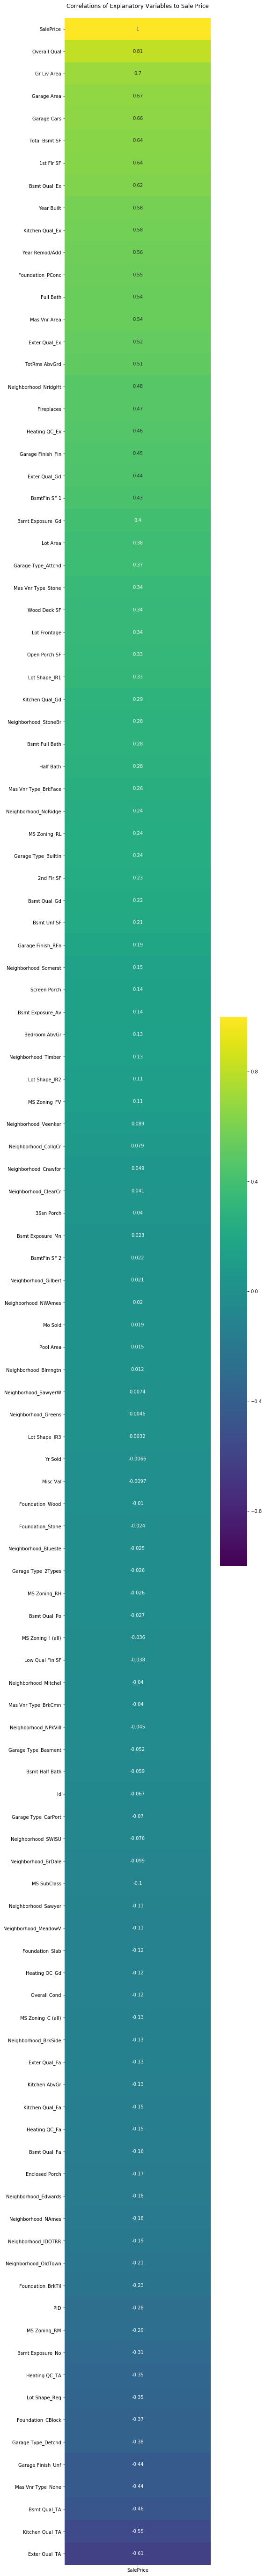

In [38]:
plt.figure(figsize=(7,100))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice',
                                                ascending=False),
           vmin=-1,
           vmax=1,
           annot=True,
           cmap='viridis')
plt.title('Correlations of Explanatory Variables to Sale Price\n');

#vmin and vmax make the scale of the correlation data -1:1

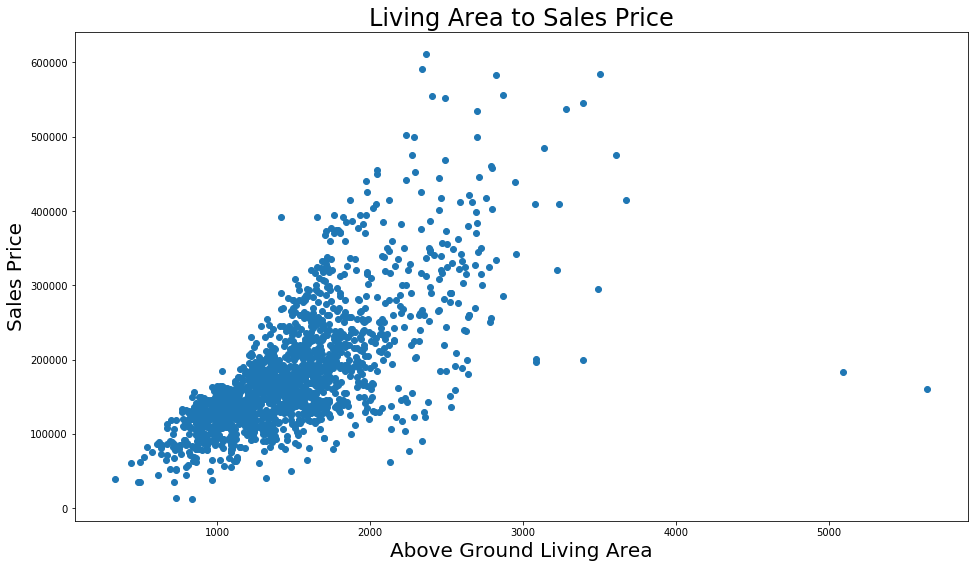

In [39]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(df['Gr Liv Area'],   # X axis
            df['SalePrice']) # Y axis

plt.title('Living Area to Sales Price', fontsize= 24)
plt.ylabel("Sales Price", fontsize = 20)
plt.xlabel("Above Ground Living Area", fontsize = 20);

In [40]:
# sns.pairplot(df)['SalePrice'][0]

# Save Cleaned Data to a new CSV

In [41]:
df.to_csv('../data/2train.csv')

# Import the Test Data & Compare to our Training Data 

In [42]:
data_test = pd.read_csv('../data/test.csv')

In [43]:
df_test = pd.DataFrame(data_test)

In [44]:
# df_test.head()

# df_test.shape

In [45]:
# Make the same changes to our test data as we did with the training data

df_test['Lot Frontage'] = pd.to_numeric(df_test['Lot Frontage'], errors='coerce')
df_test['Mas Vnr Area'] = pd.to_numeric(df_test['Mas Vnr Area'], errors='coerce')
df_test['BsmtFin SF 1'] = pd.to_numeric(df_test['BsmtFin SF 1'], errors='coerce')
df_test['BsmtFin SF 2'] = pd.to_numeric(df_test['BsmtFin SF 2'], errors='coerce')
df_test['Bsmt Unf SF'] = pd.to_numeric(df_test['Bsmt Unf SF'], errors='coerce')
df_test['Total Bsmt SF'] = pd.to_numeric(df_test['Total Bsmt SF'], errors='coerce')
df_test['Bsmt Full Bath'] = pd.to_numeric(df_test['Bsmt Full Bath'], errors='coerce')
df_test['Bsmt Half Bath'] = pd.to_numeric(df_test['Bsmt Half Bath'], errors='coerce')
df_test['Garage Cars'] = pd.to_numeric(df_test['Garage Cars'], errors='coerce')
df_test['Garage Area'] = pd.to_numeric(df_test['Garage Area'], errors='coerce')

In [46]:
# df_test.shape

In [47]:
df_test.isnull().sum().sort_values(ascending=False).head()

Pool QC         875
Misc Feature    838
Alley           821
Fence           707
Fireplace Qu    422
dtype: int64

In [48]:
df_test['Mas Vnr Area'].fillna(0, inplace=True)

In [49]:
# df_test.shape

In [50]:
# Now to get dummies for the rest of the columns

cat_cols_2 = df_test._get_numeric_data().columns

cat_cols_2

df2_not_num = df.drop(columns=cat_cols)

# df2_not_num.shape
# df2_not_num.head() # inspected columns for numeric fields storde as strings 
# df2_not_num.columns

col2_to_dum = ['Foundation', 'Bsmt Qual', 'Exter Qual', 'Heating QC', 'MS Zoning', 'Neighborhood',
              'Kitchen Qual', 'Garage Finish', 'Mas Vnr Type', 'Garage Type','Bsmt Exposure', 'Lot Shape'
             ]

In [51]:
df_test = pd.get_dummies(df_test, columns=col2_to_dum)

# df_test.shape

# df.shape

df_test = df_test.drop(columns= ['Kitchen Qual_Po', 'Mas Vnr Type_CBlock'])

# df_test.isnull().sum()

In [52]:
df_list = list(df.columns)
dft_list = list(df_test.columns)

for i in df_list:
    if i in dft_list:
        continue
    else: 
        print(i)

print('---')

for i in dft_list:
    if i in df_list:
        continue
    else: 
        print(i)
    

SalePrice
---


In [53]:
df_test.to_csv('../data/test2.csv')